In [10]:
import cantera as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(f"Running Cantera Version: {ct.__version__}")

Running Cantera Version: 3.0.0


In [22]:
To = 600
Pressures = [101325,202650,405300,810600,1621200]
flame_speeds= []
specific_heat=[]
conductivity=[]
density =[]
loglevel= 1
width = 0.02
# Define the gas-mixutre and kinetics
# In this case, we are choosing a GRI3.0 gas
gas = ct.Solution("Jerzembeck.yaml")

In [23]:
for Po in Pressures:
    gas.set_equivalence_ratio(0.6, "IXC8H18", {"O2": 1.0, "N2": 3.76})
    gas.TP = To, Po
    flame = ct.FreeFlame(gas, width=width)
    flame.set_refine_criteria(ratio=4, slope=0.2, curve=0.3,prune=0.04)
    flame.solve(loglevel, auto=True)
    flame.show()

    flame_speeds.append(flame.velocity[0])
    density.append(flame.density_mass[0])
    specific_heat.append(flame.cp_mass[0])
    conductivity.append(flame.thermal_conductivity[0])

    #flame_thickness= conductivity/(density*flame_speeds*specific_heat)
    



************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.407e-05      4.864
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.711e-05      6.747
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001948      4.356
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.004994      3.341
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accommodate flame thickness. New width: 0.04 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 
    to resolve AXC5H10 C2H C2H2 C2H3 C2H3CHO C2H3CO C2H4 C2H5 C2H5O C2H5O2 C2H6 C3H2 C

[0.04270934903995055, 0.042709336609915494, 0.042709276861941106, 0.042709272347185925, 0.04270926945464033]
[0.60330451976877, 1.2066091440218598, 2.4132192921193294, 4.826438735834222, 9.652877666140677]
[0.5987862587938045, 0.5113718472924935, 0.42060749735408, 0.34166626829277397, 0.2713553802722767]
[1127.9216890865555, 1127.921602098, 1127.9211842899983, 1127.921152781386, 1127.9211325472072]
[1.04817935e-04 6.13677901e-05 3.73052252e-05 2.29622546e-05
 1.44560010e-05]


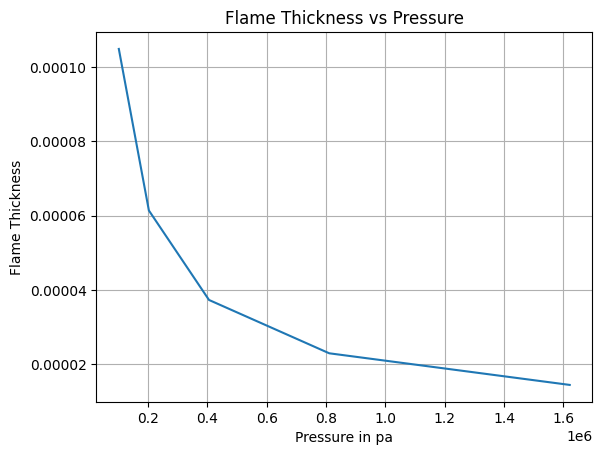

In [24]:
import numpy as np
print(conductivity)
print(density)
print(flame_speeds)
print(specific_heat)

def f_t(k,d,v,c):
    t= (k)/(d*v*c)
    return t

flame_thicknesses = np.vectorize(f_t)
del_D = flame_thicknesses(conductivity,density,flame_speeds,specific_heat)

print(del_D)

plt.plot(Pressures,del_D)
plt.title('Flame Thickness vs Pressure')
plt.xlabel('Pressure in pa')
plt.ylabel('Flame Thickness')
plt.grid(True)
plt.show()

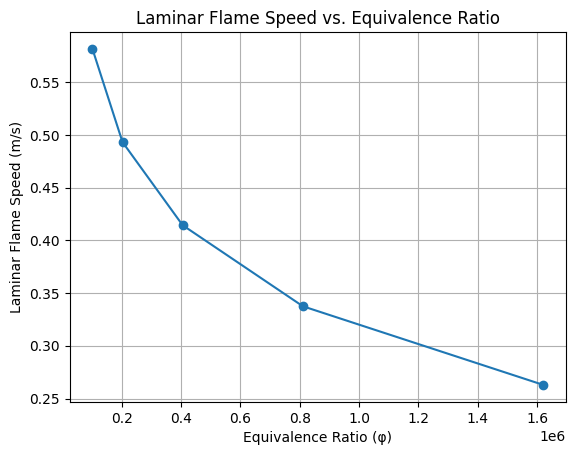

In [ ]:
plt.plot(Pressures, flame_speeds, marker='o', linestyle='-')
plt.xlabel("Equivalence Ratio (φ)")
plt.ylabel("Laminar Flame Speed (m/s)")
plt.title("Laminar Flame Speed vs. Pressure ratio")
plt.grid(True)
plt.show()